<a href="https://colab.research.google.com/github/harshild23/Analytics-Capstone/blob/main/Harshil_Analytics_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uploaded = files.upload()

Saving heart_statlog_cleveland_hungary_final.csv to heart_statlog_cleveland_hungary_final.csv


In [3]:
data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
df=pd.DataFrame(data)
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [5]:
df['chest_pain_type'] = df['chest_pain_type'].astype(object)
df['rest_ecg'] = df['rest_ecg'].astype(object)
df['st_slope'] = df['st_slope'].astype(object)

df.loc[df['chest_pain_type'] == 1, 'chest_pain_type'] = 'typical angina'
df.loc[df['chest_pain_type'] == 2, 'chest_pain_type'] = 'atypical angina'
df.loc[df['chest_pain_type'] == 3, 'chest_pain_type'] = 'non-anginal pain'
df.loc[df['chest_pain_type'] == 4, 'chest_pain_type'] = 'asymptomatic'

df.loc[df['rest_ecg'] == 0, 'rest_ecg'] = 'normal'
df.loc[df['rest_ecg'] == 1, 'rest_ecg'] = 'ST-T wave abnormality'
df.loc[df['rest_ecg'] == 2, 'rest_ecg'] = 'left ventricular hypertrophy'

df.loc[df['st_slope'] == 0, 'st_slope'] = 'normal'
df.loc[df['st_slope'] == 1, 'st_slope'] = 'upsloping'
df.loc[df['st_slope'] == 2, 'st_slope'] = 'flat'
df.loc[df['st_slope'] == 3, 'st_slope'] = 'downsloping'

df["sex"] = df["sex"].apply(lambda x: 'male' if x == 1 else 'female')

In [6]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,0
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,1
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,0
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,1
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,0


In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1190 non-null   int64  
 1   sex                      1190 non-null   object 
 2   chest_pain_type          1190 non-null   object 
 3   resting_blood_pressure   1190 non-null   int64  
 4   cholesterol              1190 non-null   int64  
 5   fasting_blood_sugar      1190 non-null   int64  
 6   rest_ecg                 1190 non-null   object 
 7   max_heart_rate_achieved  1190 non-null   int64  
 8   exercise_induced_angina  1190 non-null   int64  
 9   st_depression            1190 non-null   float64
 10  st_slope                 1190 non-null   object 
 11  target                   1190 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 111.7+ KB


,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,132.153782,210.363866,0.213445,139.732773,0.387395,0.922773,0.528571
std,9.358203,18.368823,101.420489,0.409912,25.517636,0.487360,1.086337,0.499393
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,188.000000,0.000000,121.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,229.000000,0.000000,140.500000,0.000000,0.600000,1.000000
75%,60.000000,140.000000,269.750000,0.000000,160.000000,1.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [8]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1185,False
1186,False
1187,False
1188,False


In [9]:
df.duplicated().sum()

272

In [10]:
df = df.drop_duplicates()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      918 non-null    int64  
 1   sex                      918 non-null    object 
 2   chest_pain_type          918 non-null    object 
 3   resting_blood_pressure   918 non-null    int64  
 4   cholesterol              918 non-null    int64  
 5   fasting_blood_sugar      918 non-null    int64  
 6   rest_ecg                 918 non-null    object 
 7   max_heart_rate_achieved  918 non-null    int64  
 8   exercise_induced_angina  918 non-null    int64  
 9   st_depression            918 non-null    float64
 10  st_slope                 918 non-null    object 
 11  target                   918 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 93.2+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
resting_blood_pressure,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
fasting_blood_sugar,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
max_heart_rate_achieved,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
exercise_induced_angina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
st_depression,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
target,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


{'male': 725, 'female': 193}


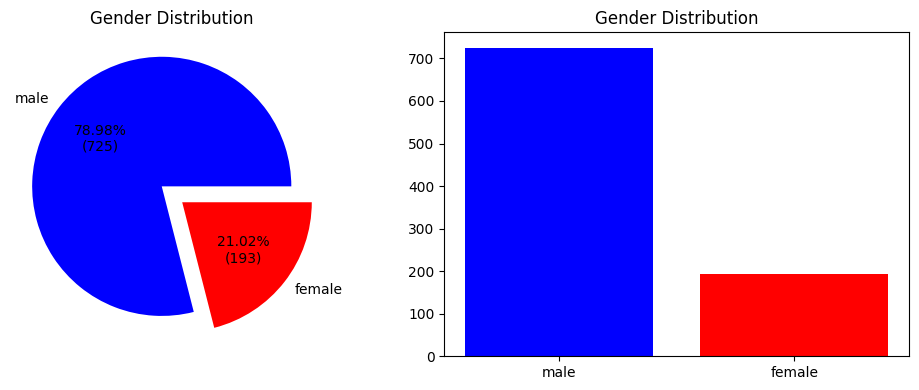

In [13]:
gender = dict(df['sex'].value_counts())
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

colors_pie = ['#0000FF', '#FF0000']
colors_bar = ['#0000FF', '#FF0000']

explode = [0.1] * len(gender)

gender = dict(df['sex'].value_counts())
print(gender)

axes[0].pie(
    list(gender.values()),
    labels=list(gender.keys()),
    autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p, p * sum(gender.values()) / 100),
    explode=explode,
    colors=colors_pie
)
axes[0].set_title("Gender Distribution")

axes[1].bar(list(gender.keys()), list(gender.values()),color=colors_bar)
axes[1].set_title("Gender Distribution")

plt.tight_layout()
plt.show()

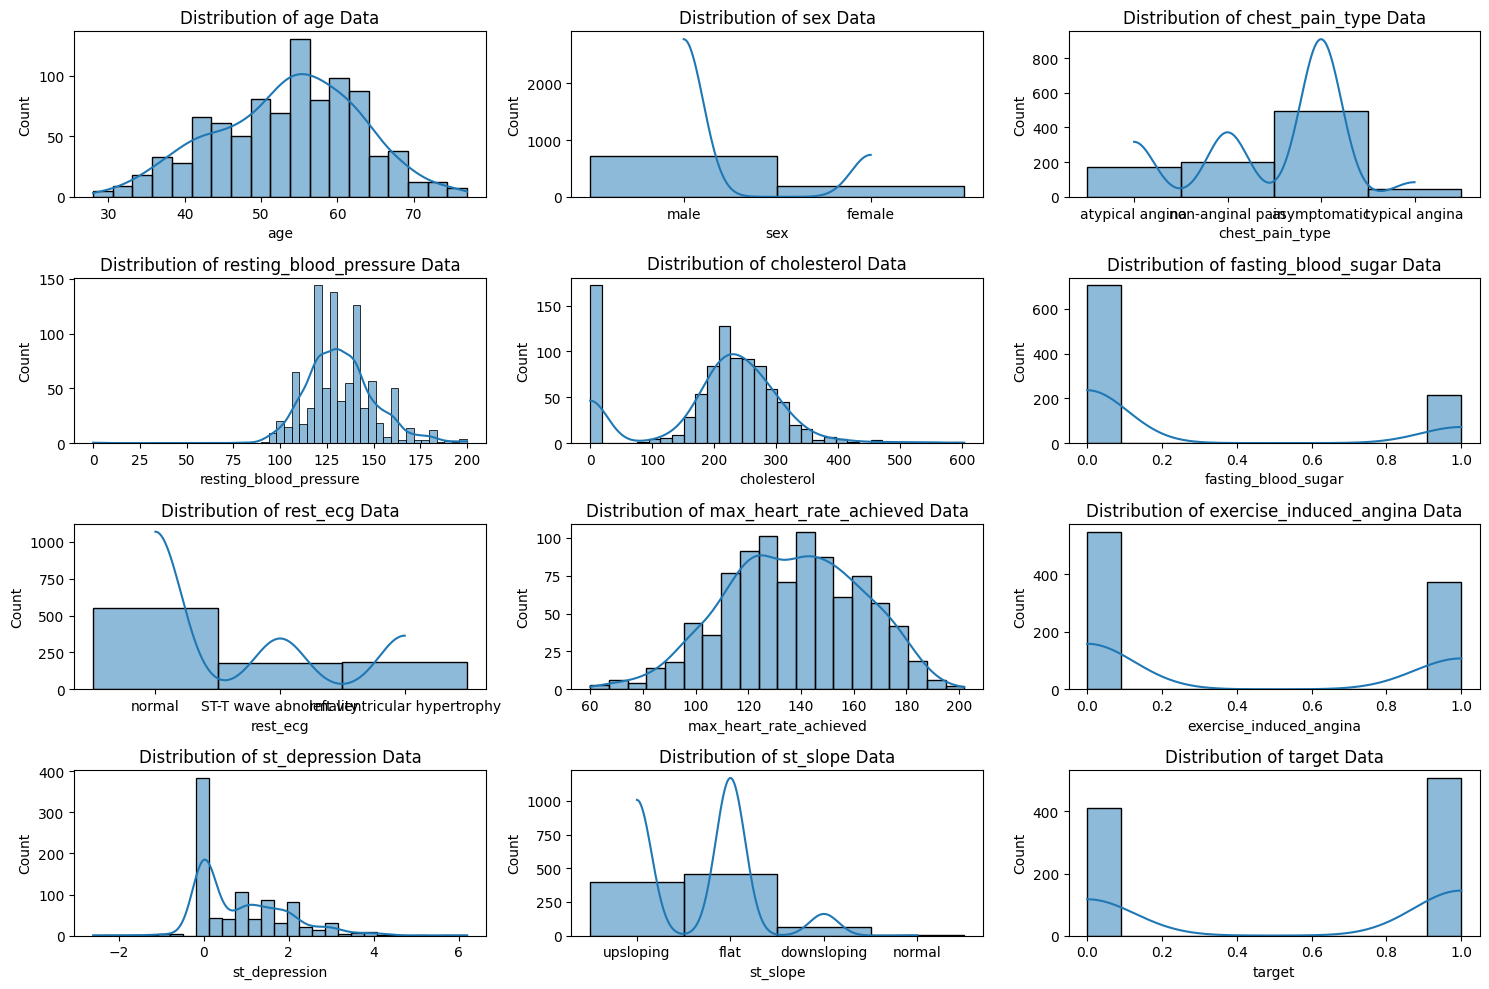

In [16]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()